# ICS 471 Project: Ai Chabot


*   Abdulrhman Aljaber 201650400
*   Hassan Alkhazal    201631580
*   Group 3
*   Section 1




# Problem description

Our purpose is to train text-to-text Ai chatbot to several Questions and answers dialogs and responds to it accordingly. We will use Conversational Question Answering dataset. 


# Preparing Data

In [100]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import random

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model

In [101]:
coqa = pd.read_json('http://downloads.cs.stanford.edu/nlp/data/coqa/coqa-train-v1.0.json')
coqa.head()

version                                               data
0        1  {'source': 'wikipedia', 'id': '3zotghdk5ibi9ce...
1        1  {'source': 'cnn', 'id': '3wj1oxy92agboo5nlq4r7...
2        1  {'source': 'gutenberg', 'id': '3bdcf01ogxu7zdn...
3        1  {'source': 'cnn', 'id': '3ewijtffvo7wwchw6rtya...
4        1  {'source': 'gutenberg', 'id': '3urfvvm165iantk...

In [102]:
del coqa["version"]

In [103]:
coqa.head()

data
0  {'source': 'wikipedia', 'id': '3zotghdk5ibi9ce...
1  {'source': 'cnn', 'id': '3wj1oxy92agboo5nlq4r7...
2  {'source': 'gutenberg', 'id': '3bdcf01ogxu7zdn...
3  {'source': 'cnn', 'id': '3ewijtffvo7wwchw6rtya...
4  {'source': 'gutenberg', 'id': '3urfvvm165iantk...

In [104]:
cols = ["text","question","answer"]
#list of lists to create our dataframe
comp_list = []
for index, row in coqa.iterrows():
    for i in range(len(row["data"]["questions"])):
        temp_list = []
        temp_list.append(row["data"]["story"])
        temp_list.append(row["data"]["questions"][i]["input_text"])
        temp_list.append(row["data"]["answers"][i]["input_text"])
        comp_list.append(temp_list)
new_df = pd.DataFrame(comp_list, columns=cols) 
#saving the dataframe to csv file for further loading
new_df.to_csv("./CoQA_data.csv", index=False)

In [105]:
data = pd.read_csv("./CoQA_data.csv")
data.head()

text  ...                               answer
0  The Vatican Apostolic Library (), more commonl...  ...  It was formally established in 1475
1  The Vatican Apostolic Library (), more commonl...  ...                             research
2  The Vatican Apostolic Library (), more commonl...  ...                     history, and law
3  The Vatican Apostolic Library (), more commonl...  ...     philosophy, science and theology
4  The Vatican Apostolic Library (), more commonl...  ...                           a  project

[5 rows x 3 columns]

In [106]:
data.describe()

text question  answer
count                                              108647   108647  108647
unique                                               6605    87780   65664
top     New York (CNN) -- A self-described "ex-madam" ...     Why?     yes
freq                                                  200      765    6867

#Clean Data

In [107]:
data.isnull().sum()

text        0
question    0
answer      0
dtype: int64

#Preproccessing Data

In [108]:
questions = data['question']
answers =data['answer']

In [109]:
questions.head()

0    When was the Vat formally opened?
1             what is the library for?
2                   for what subjects?
3                                 and?
4            what was started in 2014?
Name: question, dtype: object

In [110]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


def tokenization(text):
    num_words = 1000
    pad_type = 'post'
    trunc_type = 'post'
    tokenizer = Tokenizer(num_words=num_words)
    tokenizer.fit_on_texts(text)

    word_index = tokenizer.word_index


    train_sequences = tokenizer.texts_to_sequences(questions)


    maxlen = max([len(x) for x in train_sequences])


    train_padded = pad_sequences(train_sequences, maxlen=maxlen)


    print(len(word_index))
    print(train_padded.shape)

    print("Word index:\n", word_index)
    print("\nTraining sequences:\n", train_sequences)
    print("\nPadded training sequences:\n", train_padded)
    print("\nPadded training shape:", train_padded.shape)
    print("Training sequences data type:", type(train_sequences))
    print("Padded Training sequences data type:", type(train_padded))
    return maxlen,train_sequences,train_padded

In [111]:
encoder_maxlen, encoder_tensor, encoder_input = tokenization(questions)


23498
(108647, 29)
Word index:
 {'what': 1, 'the': 2, 'did': 3, 'was': 4, 'he': 5, 'who': 6, 'is': 7, 'to': 8, 'how': 9, 'it': 10, 'of': 11, 'in': 12, 'they': 13, 'where': 14, 'a': 15, 'does': 16, 'she': 17, 'when': 18, 'do': 19, 'his': 20, 'for': 21, 'many': 22, 'that': 23, 'were': 24, 'have': 25, 'are': 26, 'with': 27, 'and': 28, 'about': 29, 'there': 30, 'her': 31, 'why': 32, 'on': 33, 'this': 34, 'him': 35, 'name': 36, 'from': 37, 'which': 38, 'at': 39, 'one': 40, 'else': 41, 'be': 42, 'had': 43, 'them': 44, 'long': 45, 'people': 46, 'old': 47, 'first': 48, 'other': 49, 'get': 50, 'go': 51, 'has': 52, 'by': 53, 'as': 54, 'any': 55, 'their': 56, 'say': 57, 'time': 58, 'think': 59, 'like': 60, 'want': 61, 'would': 62, 'kind': 63, 'an': 64, 'been': 65, 'after': 66, 'happened': 67, 'up': 68, 'not': 69, 'will': 70, 'year': 71, 'much': 72, 'take': 73, 'doing': 74, 'or': 75, 'out': 76, 'day': 77, "what's": 78, 'then': 79, 'make': 80, 'anyone': 81, 'called': 82, 'can': 83, 'work': 84, 'cit

In [112]:
decoder_maxlen, decoder_tensor, decoder_input = tokenization(answers)

33065
(108647, 28)
Word index:
 {'the': 1, 'yes': 2, 'no': 3, 'a': 4, 'and': 5, 'of': 6, 'to': 7, 'in': 8, 'he': 9, 'his': 10, 'was': 11, 'it': 12, 'her': 13, 'unknown': 14, 'on': 15, 'for': 16, 'two': 17, 'an': 18, 'she': 19, 'at': 20, 'with': 21, 'they': 22, 'is': 23, 'three': 24, 'that': 25, 'years': 26, 'one': 27, 'as': 28, 'from': 29, 'new': 30, 'him': 31, 'or': 32, 'by': 33, 'had': 34, 'not': 35, 'their': 36, 'be': 37, 'four': 38, 'more': 39, '000': 40, 'people': 41, 'about': 42, 'were': 43, 'million': 44, 'school': 45, 'old': 46, 'than': 47, '1': 48, 'all': 49, 'up': 50, 'five': 51, 'them': 52, 'have': 53, 'world': 54, 'are': 55, 'because': 56, 'university': 57, 'i': 58, 'first': 59, 'some': 60, 'year': 61, 'house': 62, '2': 63, 'day': 64, 'city': 65, 'united': 66, 'john': 67, 'over': 68, 'mr': 69, 'out': 70, 'home': 71, 'would': 72, 'time': 73, 'into': 74, 'man': 75, 'other': 76, 'six': 77, 'you': 78, 'century': 79, 'york': 80, 'when': 81, 'mother': 82, 'after': 83, 'states': 8

In [113]:
print(decoder_input.shape)

(108647, 28)


In [114]:

print(len(encoder_input))
print(encoder_maxlen)
print(len(decoder_input))
print(decoder_maxlen)

108647
29
108647
28


In [115]:
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(encoder_input, encoder_input, test_size=0.30 ,random_state= 777)
input_tensor_test, input_tensor_val, target_tensor_test, target_tensor_val = train_test_split(input_tensor_val, target_tensor_val, test_size=0.5, random_state=777)
print(input_tensor_train.shape)
print(target_tensor_train.shape)
print(len(input_tensor_train), len(target_tensor_train), len(input_tensor_val), len(target_tensor_val), len(input_tensor_test), len(target_tensor_test))
num_encoder_tokens,numdecoder_tokens = len(input_tensor_train), len(target_tensor_train)

(76052, 29)
(76052, 29)
76052 76052 16298 16298 16297 16297


#Building Models





In [116]:
input_tensor_train = input_tensor_train.reshape(-1, 1, 29)
input_tensor_val  = input_tensor_val.reshape(-1, 1, 29)
input_tensor_test = target_tensor_test.reshape(-1, 1, 29)

target_tensor_train = target_tensor_train.reshape(-1, 1, 29)
target_tensor_val = target_tensor_val.reshape(-1, 1, 29)
target_tensor_test = target_tensor_test.reshape(-1, 1, 29)

latent_dim=256
num_encoder_tokens= 29
num_decoder_tokens=  29





*  GRU Model 









Model: "model_60"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Encoder_Input (InputLayer)     [(None, None, 29)]   0           []                               
                                                                                                  
 Decoder_Input (InputLayer)     [(None, None, 29)]   0           []                               
                                                                                                  
 Encoder_GRU (GRU)              [(None, 256),        220416      ['Encoder_Input[0][0]']          
                                 (None, 256)]                                                     
                                                                                                  
 Decoder_GRU (GRU)              [(None, None, 256),  220416      ['Decoder_Input[0][0]',   

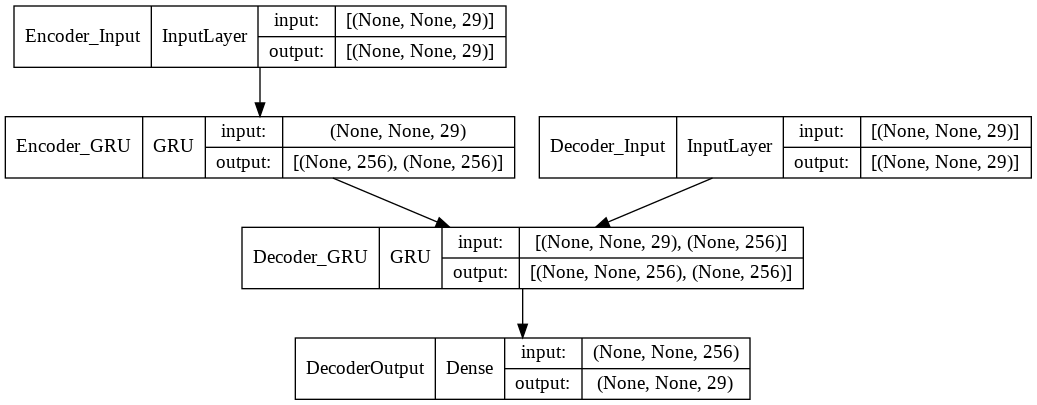

In [117]:

from keras.models import Model
from keras.layers import Input,Dense
encoder_inputs = Input(shape=(None,num_encoder_tokens), name="Encoder_Input")
encoder = GRU(latent_dim, return_state=True, name="Encoder_GRU")
_, encoder_state = encoder(encoder_inputs)
decoder_inputs = Input(shape=(None, num_decoder_tokens), name="Decoder_Input")
decoder_gru = GRU(latent_dim, return_sequences=True, return_state=True, name="Decoder_GRU")

decoder_outputs, _ = decoder_gru(decoder_inputs, initial_state=encoder_state)

decoder_dense = Dense(num_decoder_tokens, activation='softmax', name="DecoderOutput")
decoder_outputs = decoder_dense(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=5)    
mc = tf.keras.callbacks.ModelCheckpoint('best_GRU.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history_GRU = model.fit([input_tensor_train, target_tensor_train],target_tensor_train,
          batch_size=128,
          epochs=10,
          callbacks = [es,mc],
          validation_data=([input_tensor_val,target_tensor_val],target_tensor_val))

encoder_model = Model(encoder_inputs, encoder_state)
decoder_states_inputs = Input(shape=(latent_dim,))
decoder_outputs, decoder_states = decoder_gru(
    decoder_inputs, initial_state=decoder_states_inputs)
decoder_outputs = decoder_dense(decoder_outputs)

decoder_model = Model(
    [decoder_inputs] + [decoder_states_inputs],
    [decoder_outputs] + [decoder_states])
plot_model(model, to_file='model_GRU.png', show_shapes=True)

In [86]:
test_GRU =  model.evaluate([input_tensor_test,target_tensor_test],target_tensor_test,batch_size = 64)


255/255 [==============================] - 2s 6ms/step - loss: 27078.7090 - accuracy: 0.8478




*   LTSM Model



Model: "model_54"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_78 (InputLayer)          [(None, None, 29)]   0           []                               
                                                                                                  
 input_79 (InputLayer)          [(None, None, 29)]   0           []                               
                                                                                                  
 lstm_53 (LSTM)                 [(None, 256),        292864      ['input_78[0][0]']               
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                           

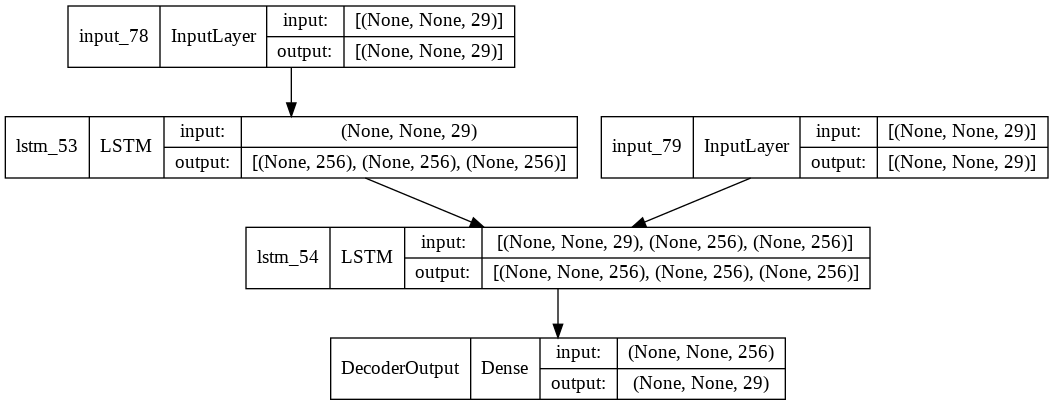

In [87]:

from keras.models import Model
from keras.layers import Input, LSTM, Dense


encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)

encoder_states = [state_h, state_c]

decoder_inputs = Input(shape=(None, num_decoder_tokens))
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax', name="DecoderOutput")
decoder_outputs = decoder_dense(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
print(model.summary())
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=5)    
mc = tf.keras.callbacks.ModelCheckpoint('best_LTSM.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history_LTSM = model.fit([input_tensor_train, target_tensor_train],target_tensor_train,
          batch_size=128,
          epochs=10,
          callbacks = [es,mc],
          validation_data=([input_tensor_val,target_tensor_val],target_tensor_val))

encoder_model = Model(encoder_inputs, encoder_states)

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)
plot_model(model, to_file='model_LTSM.png', show_shapes=True)

In [88]:
test_ltsm =  model.evaluate([input_tensor_test,target_tensor_test],target_tensor_test,batch_size = 64)


255/255 [==============================] - 2s 6ms/step - loss: 14129.2871 - accuracy: 0.8635




*   Bidirectional LTSM Model



Model: "model_57"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_82 (InputLayer)          [(None, None, 29)]   0           []                               
                                                                                                  
 bidirectional_5 (Bidirectional  [(None, 512),       585728      ['input_82[0][0]']               
 )                               (None, 256),                                                     
                                 (None, 256),                                                     
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                           

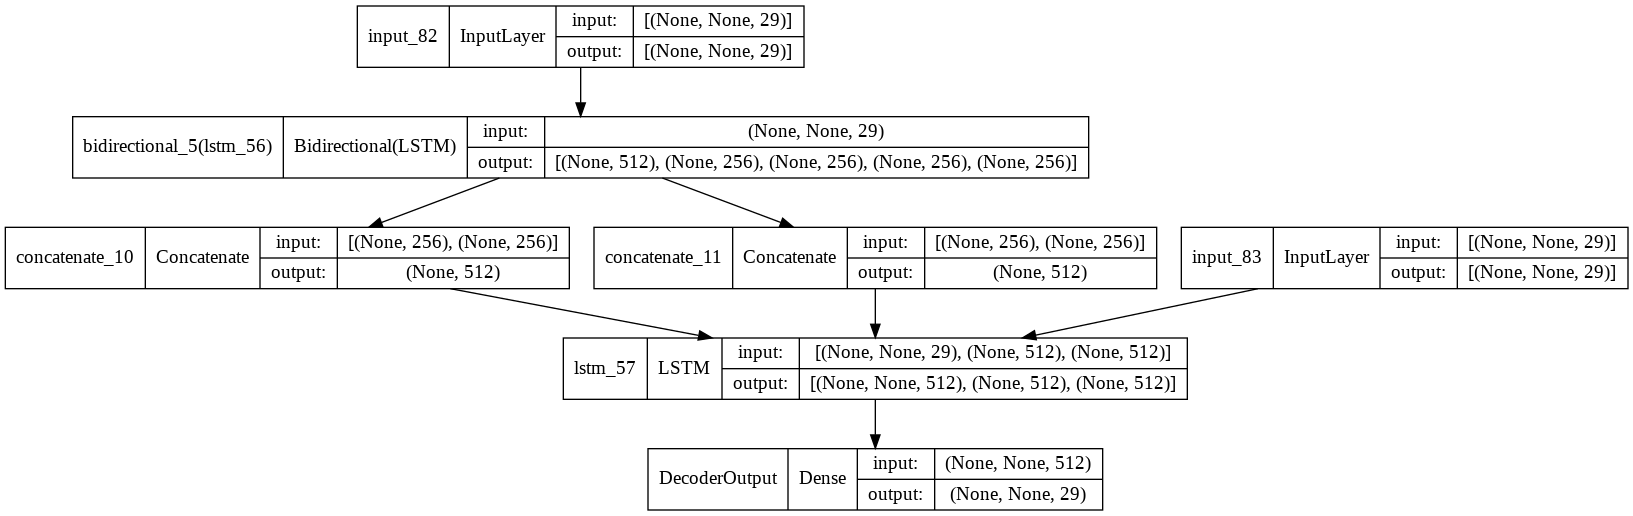

In [89]:

from keras.models import Model
from keras.layers import Input, LSTM, Dense,Bidirectional,Concatenate



encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)

encoder = Bidirectional(LSTM(latent_dim, return_state=True))
encoder_outputs, forward_h, forward_c, backward_h, backward_c = encoder(encoder_inputs)

state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])
encoder_states = [state_h, state_c]




decoder_inputs = Input(shape=(None, num_decoder_tokens))
decoder_lstm = LSTM(latent_dim*2, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax', name="DecoderOutput")
decoder_outputs = decoder_dense(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
print(model.summary())
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=5)    
mc = tf.keras.callbacks.ModelCheckpoint('best_BiLtsm.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history_BI_LTSM = model.fit([input_tensor_train, target_tensor_train],target_tensor_train,
          batch_size=128,
          epochs=10,
          callbacks = [es,mc],
          validation_data=([input_tensor_val,target_tensor_val],target_tensor_val))


encoder_model = Model(encoder_inputs, encoder_states)

decoder_state_input_h = Input(shape=(latent_dim*2,))
decoder_state_input_c = Input(shape=(latent_dim*2,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)
plot_model(model, to_file='model_Biconditional.png', show_shapes=True)

In [90]:
test_BiLtsm =  model.evaluate([input_tensor_test,target_tensor_test],target_tensor_test,batch_size = 64)

255/255 [==============================] - 2s 7ms/step - loss: 37943.3828 - accuracy: 0.8551


# Result Analysis

The first problem we faced was understanding the encoder-decoder model, we managed that by re-reading the course slide and Keras documentation.
Second problem we faced was regarding downloading the data since it was in '.json' format,  and we managed that by using pandas library and extracting the data into a DataFrame.
Third problem we faced was about the models not accepting the inputs dimensions, and we managed to resolve that by reshaping the encoder-decoder data into 3 dimensions.


# Conclusion

We managed successfully to train an Ai chatbot using 3 different Sequence-Sequence Models, Moreover, we were able to download and save the data into a separate '.csv' file. Nevertheless, By displaying the data description, we found that it was balanced and don't need any cleaning. Then, we preprocessed the data using keras tokenizer and padded the sentences to prepare it for the model. Also, we built GRU, LTSM, and Biconditional LTSM models. 

# References



*   https://keras.io/*
*   https://stanfordnlp.github.io/coqa/
*   https://stackoverflow.com/*



